In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


In [117]:
df = pd.read_csv('insurance.csv')

In [118]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
df.shape

(1338, 7)

In [120]:
le = LabelEncoder()

In [121]:
le.fit(df.sex.drop_duplicates())

LabelEncoder()

In [122]:
df.sex = le.transform(df.sex)

In [123]:
#smoker or not

le.fit(df.smoker.drop_duplicates())

LabelEncoder()

In [124]:
df.smoker = le.transform(df.smoker)

In [125]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [126]:
#region

le.fit(df.region.drop_duplicates())

LabelEncoder()

In [127]:
df.region  =le.transform(df.region)

In [128]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [129]:
columns =  df.columns[:-1]
X  = df[columns]

In [78]:
y = df['charges']


In [80]:
test_size=0.3 

In [81]:
X_train  , X_test ,y_train , y_test = train_test_split(X , y ,
                                                      test_size=test_size,
                                                      shuffle=True,
                                                      random_state=42)

In [83]:
model = LinearRegression()

In [84]:
model.fit(X_train , y_train)

LinearRegression()

In [100]:
#save the model to the disk
import pickle
filename = 'final_model.pickle'

pickle.dump(model , open(filename,'wb'))

In [101]:

#load the model from the desk


loaded_model = pickle.load(open(filename , 'rb'))

In [102]:
result = loaded_model.score(X_test, y_test)

In [103]:
result

0.7694415927057693

# EDA

In [108]:
import seaborn as sns
import numpy as np

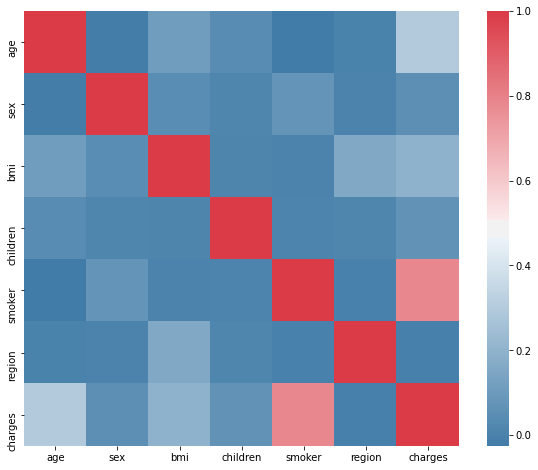

In [113]:
f , ax = plt.subplots(figsize=(10,8))
corr = df.corr()

sns.heatmap(corr,  mask=np.zeros_like(corr , dtype=np.bool) ,
           cmap=sns.diverging_palette(240,10,as_cmap=True) ,
           square=True , ax=ax)

ValueError: Could not interpret input 'charges'

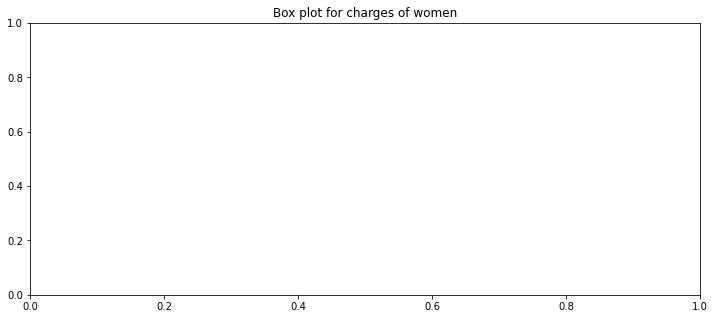

In [130]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", df =  df[(df.sex == 1)] , orient="h", palette = 'magma')